In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train = pd.read_csv("Data/train.csv", parse_dates=['time'],index_col='time')

In [3]:
train.drop('id',inplace=True,axis=1)

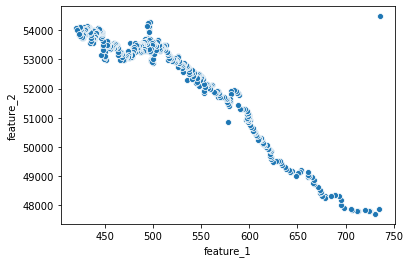

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.scatterplot(data=train,x='feature_1',y='feature_2')

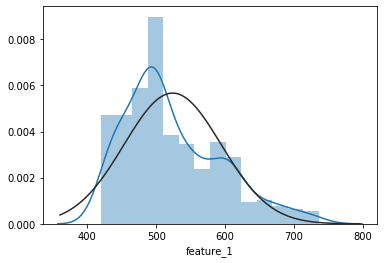

In [5]:
from scipy.stats import norm

sns.distplot(train['feature_1'],fit=norm)

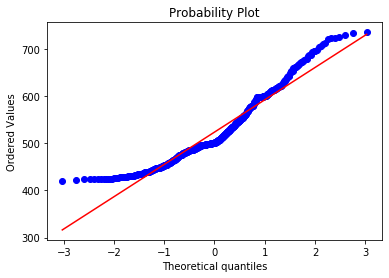

In [6]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(train.feature_1, plot=plt)
plt.show()

In [7]:
X=train[['feature_1']]
y=train[['feature_2']]

In [8]:
#splitting into training and validation set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

test_1 = np.asanyarray(X_train[['feature_1']])

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(test_1)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X_train_poly,y_train)

In [11]:
from sklearn.metrics import r2_score,mean_squared_error


X_test_poly = poly.fit_transform(X_test)
y_hat = lr.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Root mean squares (MSE): %.2f" % np.sqrt(mean_squared_error(y_hat, y_test)))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Mean absolute error: 242.49
Root mean squares (MSE): 582.22
R2-score: 0.87


In [12]:
lr.coef_

array([[ 0.00000000e+00,  4.09505782e+02, -7.17418140e-01,
         3.89687601e-04]])

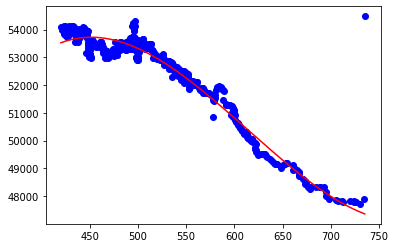

In [13]:
plt.scatter(train.feature_1, train.feature_2,  color='blue')

XX = np.arange(train.feature_1.min(), train.feature_1.max(), 1)
yy = (lr.intercept_[0]*np.power(XX, 0)
        +lr.coef_[0][1]*np.power(XX, 1)
        +lr.coef_[0][2]*np.power(XX, 2)
        +lr.coef_[0][3]*np.power(XX, 3))
#         +lr.coef_[0][4]*np.power(XX, 4))
        

plt.plot(XX, yy, '-r' )

# Using Actual data

In [23]:
test = pd.read_csv('Data/test.csv', parse_dates=['time'],index_col='time')

In [24]:
id = test['id']
test.drop('id',inplace=True,axis=1)

In [25]:
test_poly = poly.fit_transform(test)
y_hat = lr.predict(test_poly)

In [26]:
test['feature_2'] = y_hat

In [27]:
sol = test.drop('feature_1',axis=1)

In [28]:
sol.index=id

In [29]:
sol.to_csv("Solution2.csv")